#Problem 1

In [58]:
import os
import pandas as pd
import numpy as np 
import scipy
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt

#Part a

In [59]:
offset = 2

def toydata(n):
    class_1_size = n/2
    class_2_size = n - class_1_size
    classes = {}

    for example1,example2 in zip(range(int(class_1_size)),range(int(class_2_size))):
        #draw random points from normal distribution
        point1 = np.random.normal(loc=[0,0], scale=[1,1])
        (x1,y1) = point1[0],point1[1]
        classes[(x1,y1)] = -1 #put into class1
        point2 = np.random.normal(loc=[offset,offset], scale=[1,1])
        (x2,y2) = point2[0],point2[1]
        classes[(x2,y2)] = 1 #put into class2

    return classes

#Part b

In [70]:
def computeybar(dat): 
    prob_x_1 = scipy.stats.multivariate_normal(mean=[0,0], cov=np.identity(2)) #class1
    prob_x_2 = scipy.stats.multivariate_normal(mean=[offset,offset], cov=np.identity(2)) #class2
    ybar = []
    prob_y_1 = 0.5
    prob_y_2 = 0.5

    for x in dat:
        p_d_f = (-prob_x_1.pdf(x)*prob_y_1 + prob_x_2.pdf(x)*prob_y_2)/(prob_x_1.pdf(x)*prob_y_1 + prob_x_2.pdf(x)*prob_y_2)
        ybar.append(p_d_f)
    
    #print(np.array(ybar))
    y_bar = np.array(ybar)
    #print(y_bar.shape)
    return y_bar


#Part c

In [62]:
def computehbar(lambda_,points,num_models=25): #points as calculated from toydata
    #generate nmodel many models (Ridge regression)
    models = []
    for mod in range(num_models):
        ridge_mod = Ridge(alpha=10**lambda_)
        models.append(ridge_mod)


    #generate n-many training sets for these n-many models
    datasets = []
    for mod in range(num_models):
        dat = toydata(500)
        datasets.append(dat)


    #train the n-many models
    for i in range(num_models):
        X = np.array(list(datasets[i].keys()))
        y = np.array(list(datasets[i].values()))
        models[i].fit(X=X,y=y)

    classifications = []
    for mod in models:
        m_ = np.array(list(points.keys()))
        m_pred = mod.predict(m_)
        classifications.append(m_pred)


    #25 models trained over each of the 500 points 
    #across rows, different predictions for the same point

    #mean of the classifications, for each of the 500 points
    #for each coordinate, in 500x1, it is the 25 model predictions for that X (where the X is the point in question)
    hbar = np.mean(classifications, axis=0)
    return hbar,classifications


#Part d

In [63]:
def computevariance(hbar,classifications):
    #25 Hds, applied to all 25 vectors

    sub_var = []
    for m in classifications:
        sub = m - hbar
        sub_var.append(sub**2)
    variance = np.mean(sub_var)
    return variance

#Part e

In [64]:
def computeBias(hbar,ybar):
    bias = np.mean((hbar-ybar)**2)
    return np.mean(bias)


#Part f

In [65]:
def computeNoise(ybar,Y):
    noise = np.mean((ybar-Y)**2)
    return noise

#Part g

In [68]:
def biasvariancedemo():
    #plot: variance, bias, noise, test error, bias+variance+noise

    var_list = []
    bias_list = []
    noise_list = []
    error_list = []

    for lambda_ in np.arange(-10,10,0.1):
        dat = toydata(500)
        X = np.array(list(dat.keys()))
        Y = np.array(list(dat.values()))
        
        #get ybar
        ybar_ = computeybar(dat)
        #get hbar
        hbar_,classifications_ = computehbar(lambda_,dat)
        #get variance
        var = computevariance(hbar_,classifications_)
        var_list.append(var)
        #get bias
        bias_ = computeBias(hbar_,ybar_)
        bias_list.append(bias_)
        #get noise
        noise_ = computeNoise(ybar_,Y)
        noise_list.append(noise_)
        #get error
        error = var + bias_ + noise_
        error_list.append(error)
    return var_list,bias_list,noise_list,error_list

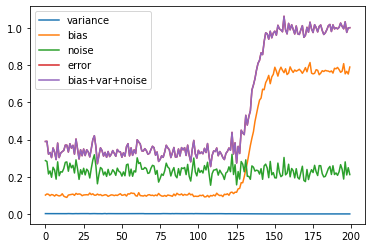

In [71]:
v,b,n,e = biasvariancedemo()

b_v = np.add(b,v)  
b_v_n = np.add(b_v,n)
plt.plot(v,label='variance')
plt.plot(b,label='bias')
plt.plot(n,label='noise')
plt.plot(e,label='error')
plt.plot(b_v_n,label='bias+var+noise')
plt.legend()
plt.show()

It's hard to tell, but actually the variance IS decreasing.  

#Part 2

In [12]:
#imports

import pandas as pd
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math


In [13]:
#create dataset of points
#f=open('/Users/benso/Desktop/Projects/MachineLearning/Assignment3/hw3_data2.txt',"r")
f=open('/Users/lvbenson/Research_Projects/MachineLearning/Assignment3/hw3_data2.txt',"r")

lines = f.readlines()
result=[]
for x in lines:
    result.append(x.split(',')[0])
f.close()

target = []
for sign in result:
    if sign == '+':
        target.append(1)
    else:
        target.append(-1)

#f=open('/Users/benso/Desktop/Projects/MachineLearning/Assignment3/hw3_data2.txt',"r")
f=open('/Users/lvbenson/Research_Projects/MachineLearning/Assignment3/hw3_data2.txt',"r")
lines1=f.readlines()
result2=[]
for x in lines1:
    result2.append(x.split(',')[1])
f.close()

x_coords = []
for coord in result2:
    x_coords.append(coord)

#f=open('/Users/benso/Desktop/Projects/MachineLearning/Assignment3/hw3_data2.txt',"r")
f=open('/Users/lvbenson/Research_Projects/MachineLearning/Assignment3/hw3_data2.txt',"r")
lines2=f.readlines()
result3=[]
for x in lines2:
    x_ = x.split(',')[2].rstrip('\n')
    result3.append(x_)
y_coords = []
for coord in result3:
    y_coords.append(coord)
data = []
for x,y in zip(x_coords,y_coords):
    data.append([x,y])
f.close()

X = np.array(data,dtype=float)
Y = np.array(target,dtype=float)

In [4]:
#create test, train vectors
x_train,x_test,y_train,y_test = train_test_split(X,Y)

There are a ton of overlapping points, so it seems like using an rbf kernel, which is good at defining soft margins, so to avoid overfitting or underfitting, I'm choosing this kernel. 

In [14]:
def rbf_kernel(X,gamma):
    K = np.zeros((X.shape[0],X.shape[0]))
    for i in range(X.shape[0]): 
        for j in range(X.shape[0]):
            K[i,j] = np.exp(-gamma*np.linalg.norm(X[i]-X[j])**2) # rbf kernel alg, kinda like euclid distance. All this function does it calculate the kernel, to be used later.
    return K

In reference to this document: http://www.robots.ox.ac.uk/~az/lectures/ml/lect3.pdf, and this document: https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-iii-5dff33fa015d, as well as theoretical conversations with Daniel (where we discussed the sub-gradient approach to determining the change in hyperplane) the following is an implementation of accounting for the change in our w vector paired with our gradient descent. I call it 'wiggle' because the point of is to determine how much to change the hyperplane until it has finally correctly classified as much as possible.











In [15]:
def Wiggle(w,K,X,Y,reg_term=1,C=1): #K is 2700 x 2700 matrix (for training data), x is 2700x2, w is 2700x1 (training data)
    #Hinge loss determinism. This finds how much the w vector changes to get closer and closer to complete classification.
    L_list = []
    size_y = range(len(y))
    for i in size_y:
        if -Y[i]*classification(i,w,Y,K)<1: #condition for needing to change the w vector
            L_list.append(i) 

    for i in size_y:
        for j in L_list:
            sub_grad_help = sum([Y[j]*K[j][i]]) #calculating the sub-gradient, depending on our hinge loss list
        sub_grad_list = [(-Y[i]*sub_grad_help)]
        w_change = np.array(sub_grad_list) #an array of places and values for which we need to change our w vector, to update the classifications 

    return w_change

In [16]:
#this is our overall classification function that we'll use to check to see if the point is classified as positive or negative.
def classification(index_x,w,Y,K):
    size_y = range(len(Y))
    class_func = 0
    for i in size_y:
        k_calc = K[index_x][i]*w[i]
        class_func = class_func + Y[i]*k_calc
    return class_func

In [17]:
def SVM(X,Y,K,epochs=30,learn_rate=1,reg_term=1,C=1,Gamma=1):
    #initialize random weights
    w = np.zeros(X.shape[0])
    for epoch in range(epochs):
        w_change = Wiggle(w,K,X,Y,reg_term,C) #calculates the wiggle
        w = np.subtract(w,w_change) #account for the wiggle in the w vector by subtracting it from our prior w vector
    
    return w #gives us our new w vector, accounting for the required update in values

In [18]:
def solve_classifier(X,Y,epochs=30,learn_rate=1,reg_term=1,C=1,Gamma=1):
    K = rbf_kernel(X,Gamma) #create our kernel
    w_vector = SVM(X,Y,K,epochs,learn_rate) #this is what will return our w vector, to then be wiggled and classified

    classifications = []
    for i in range(len(X)):
        class_ = classification(i,w_vector,Y,K) #get classifications for our training data
        classifications.append(class_)

    return classifications,w_vector

classes,w = solve_classifier(x_train,y_train)
correct_classify = []
incorrect_classify = []

In [19]:
#check out the training data accuracy

for i,y in zip(classes,y_train):
    if i > 0 and y == 1:
        correct_classify.append(1)
    elif i < 0 and y == -1:
        correct_classify.append(1)
    else:
        incorrect_classify.append(1)
total_correct = (len(correct_classify)) / (len(correct_classify) + len(incorrect_classify))
print(total_correct,' :accuracy of training data')


0.952962962962963  :accuracy of training data


In [20]:
#check out the test data accuracy. only calculate kernel and classes, use the w that is already calculated from training.
K = rbf_kernel(x_test,1)
classifications_test = []
for i in range(len(x_test)):
    class_1 = classification(i,w,y_test,K)
    classifications_test.append(class_1)

correct_classify_test = []
incorrect_classify_test = []

#check out the training data accuracy

for i,y in zip(classifications_test,y_test):
    if i > 0 and y == 1:
        correct_classify_test.append(1)
    elif i < 0 and y == -1:
        correct_classify_test.append(1)
    else:
        incorrect_classify_test.append(1)
total_correct_test = (len(correct_classify_test)) / (len(correct_classify_test) + len(incorrect_classify_test))
print(total_correct_test,' :accuracy of test data')

0.9655555555555555  :accuracy of test data


Our training and testing data perform almost identically, which is great! The classifier is probably working. Now let's plot it. Because I opted for a gaussian kernel, and the hyperplane is really long, I couldn't use normal plotting methods. I found this implementation online which I adapted for my plotting purposes: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

It showed me how to use contourplot and a meshgrid to plot the hyperplane. 

In [32]:
#time to plot. 

plot_x,plot_y = np.meshgrid(np.linspace(-30,50,100),np.linspace(-30,50,100))


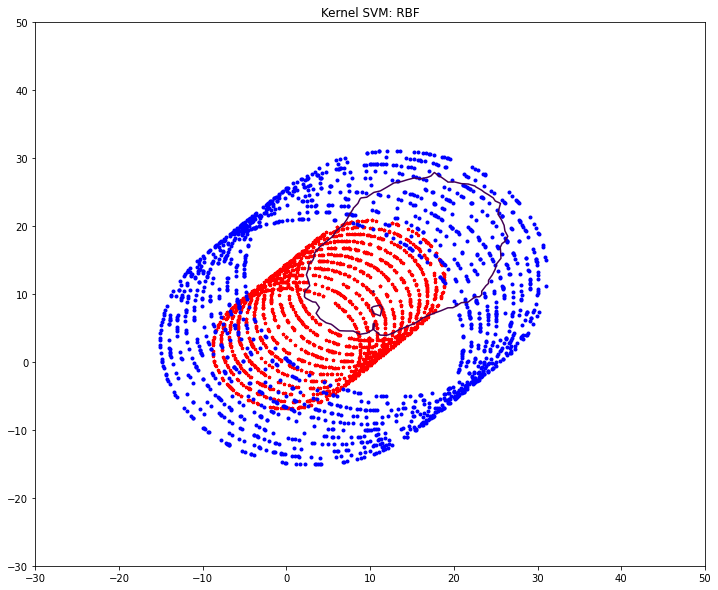

In [37]:
xy = np.vstack([xx.ravel(),yy.ravel()]).T

def plot_classification(pt,w=w,gamma=1,X=x_train,Y=y_train):
    point_func = 0
    for i in range(len(X)):
        new_k = np.exp(-gamma)
        new_k = np.exp(-gamma*np.linalg.norm(pt-X[i])**2)
        new_k *= w[i]*Y[i]
        point_func += new_k
    return point_func

z = []
for example in xy:
    z_p = plot_classification(pt=example)
    z.append(z_p)
new_z = np.array(z)

plt.figure(figsize=(12,10))
for d, sample in enumerate(X):
    if Y[d] == -1:
        plt.scatter(sample[0], sample[1], s=4, marker='o', c='blue',linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=4, marker='*', c='red',linewidths=2)
plt.contour(plot_x,plot_y,(new_z).reshape(plot_x.shape),levels=[0],color='black')
plt.title('Kernel SVM: RBF')
plt.show()


It's kind of hard to see, but the hyperplane is "on top" of the red ring.

#3, Part 1

Give three features that would allow you to distinguish between malign and benign tumors. Describe shortly how to calculate them given the images in figure 1a and 1b, or segmented images. Describe shortly why you chose these features.

A few features I would use, based on the images in the figures, are the following: 
(1) Shape: Malign tumors are spikier, while beign tumors have smoother edges. A common technique in image classification is detecting the circularity of an image (https://sciencing.com/calculate-circularity-5138742.html) so I would use this formula:  𝐶=(4∗𝜋∗𝐴)/𝑝2  as a way of determining which tumors are inherently rounder in shape.

(2) A key difference between malignant and benign tumors is that in malignant tumors, they "Often invade basal membrane that surrounds nearby healthy tissue" (https://www.verywellhealth.com/what-does-malignant-and-benign-mean-514240) whereas benign tumors tend not to spread. Therefore, one might be able to analyze surrounding tissue for spread as a possible feature. It might not be visually obvious, so from these images, I would keep track of the fine-grained color gradient to identify surrounding areas of possible spread (where surrounding areas of malignant tumors might be slightly lighter to indicate tunor spread)

(3) A third feature I would use would be the change in size over time. For a benign tumors, the size probably won't change much, so this change in size would be close to zero. This size difference would be calculatable given multiple images of the same tumors over time.

#Part 2

Given these features design a classifier. Assume that the cost of misclassifying a malign tumor is 2 times the cost to misclassify a benign. Explain what other assumptions you are making (if any).

Given: Cost of missclassifying a malign tumor is 2 times the cost to misclassify a beign tumor.

Clearly, it is much worse to incorrectly classify a malignant tumor. So, I would design a classifier according to the following steps:

1) Use conditional probability (specifically Bayes theorem) to calculate the probability of a benign tumor, given our feature vector. With our training data (that we would need to obtain) we can say that the probabilities of a malign tumor and a benign tumor are each 0.5. Our classes in this case are: class 1 (malign) and class 2 (benign). So, we can use a Gaussian pdf for each class's likelihood. Since the images are our set of "training" data, we iterate through each image in the data in order to calculate our feature vector. Then, the classifications can be calculated given the option of choosing an either benign or malignant tumor. Our parameter P is what will determine the difference in cost for the missclassification.

Prob(choosing benign|features) = 0Prob(benign|features) + 2P*Prob(malign|features)

Prob(choosing malign|features) = PProb(benign|features) + 0Prob(malign|features)

#Part 3

a) To generate ROC(1), which corresponds to the radiologist performance, we first of all need to be able to compare the radiologist classification with the actual classifications. As it stands, I believe the only way to determine the "actual" classification (or our Y vector in our training set) is by evaluating a biopsy for either a malign or benign tumor. So, our training set as determined by biopsies is compared to the classifications made by the radiologists of the testing data (the imageS). The way this works is that, rather than having radiologists binarily classify each data point (each image) they could do so based on a sliding scale. For example, image 3 of the malign images looks like it could probably be either malign or benign, so a radiologist could classify it as "possibly malign". So, given an image, they could decide if a tumor is benign, possibly benign, possibly malign, or malign. Then, these classifications can be compared against our training data (which is still of course binary) and thus creating the ROC curve, showing the probability that a given tumor is malign as a function of the radiologists' classifications.

b) To generate ROC(2), which corresponds to the performance of the CAD system, we again need to compare its classification with the training set. The existing CAD system, if I understand correctly, will either classify a tumor as benign or not. Based on our classifier that is based on the training data, we have the probability of a tumor being benign or not. So, we can calculate the probability that a given image in the test set is malign, and then compare it to the diagnosis from the CAD system. This way, we will know how much the CAD diagnosis matches up with our calculated probabilities. If the probability of a particular tumor being malign is high, and the CAD also classifies it as malignant, then we can reasonably conclude that particular probabilities correspond with particular diagnoses by the CAD system. These conclusions, when compared with the classifications of the training data will create the ROC curve.

c) To generate ROC(3), we perform a similar analysis to the process in ROC(2), but we would need to have access to a separate training data set. The reason for this is that this new ROC system is designed specifically for this set of images in mind. Perhaps another set of images showing other features of malign and benign tumors would not accurately train our classification. So, to see if our new ROC actually works, we'd need to try it out with a different dataset to see if our picked-out features are actual universal and good features after all.

d) Given all three of our ROC curves, we can compare their performances simply by calculating the area under the curve (integrating). The axes show that a smaller area under the curve indicates a larger false positive fraction, and vice vesa. So, the curve with the largest area underneath will have the largest true positive fraction, which is what we want.

e) It looks like the radiologists are performing better than the original CAD system, but the new CAD system performs better than the radiologists for a little bit.

f) As far as the CAD systems in relation to each other, they overall perform similarly, but in slightly different ways. The new CAD system (ROC3) performs better if its more important to classify a tumor as malign if it is indeed malign, at the expense of potentially missing some malign tumors. The old CAD system performs better if its more important to always classify a malign tumor as malign, at the expense of sometimes classifying a non-malign tumor as malign. Personally, I think the latter option is probably better, because even though its very scary to receive a false positive diagnosis, it's way worse to miss a malign diagnosis.

#Part 4

If there are different clusters in the feature space for the same classes, we should probably change the classifier. First of all, we might need more data in our training data to understand the distribution. Harnassing the usefulness of clustering in any sort of object-recognition task can be useful. K-means, of course a popular partitioning algorithm, would be able to cluster points based on their similarity in the feature space. Or, rather than changing the entire classifier, maybe I could use a clustering method as a pre-processing step.